# Superposition d'écoulements
Avec ce TP numérique, nous allons implémenter les écoulements vus en classe et construire des écoulements plus complexe grace au prinicipe de superposition.

## Objectifs de la séance
Comprendre le lien pression, vitesse et la generation de la portance sur une forme


**NB**: Notez que pour se simplifier la programmation, on n'utilisera pas d'incidence dans le TD d'aujourd'hui. 

### Modules python et paramètres pour les graphiques
En plus des modules de base, nous utiliserons un module personnel pour implémenter les formules vues en classe et supperposer facilement les écoulements.  
**Attention** Si vous modifiez le module `banque_ecoulement.py`, vous devez recharger le module après avoir redémarré le noyau `kernel`. Vous pouvez utiliser la commande `Restart Kernel and Run up to Selected Cell` dans le menu `Kernel`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import module.banque_ecoulements as bq
import module.helper_plot_ecoulement as pl
pl.set_nice_plot_params()
Ncontours = 25

### Exercice 1 - Comprendre le fonctionnement du module

1. Ouvrez le fichier `banque_ecoulement.py` et essayer de comprendre l'utilisation qui en est faite ci-dessous. 
2. Des fonctions de tracés sont proposées dans le module `helper_plot_ecoulement.py`. Regardez l'usage qui en est fait comme illustration et utilisez la commande `help(pl.<fonction>)` pour obtenir de l'aide.
  * `pl.plot_contours_phi_psi`
  * `pl.plot_lignes_courant`
  * `pl.plot_champs`

3. Modifiez les paramètres de définitions de la grille ou de l'écoulement
4. Lorsque vous êtes suffisamment initié, complétez les écoulements de la banque en éditant le fichier `banque_ecoulement.py` et testez les ! 

In [2]:
grid = bq.create_2Dgrid_cart()

In [3]:
Vinf = 2.0
L = 5.0
d0 = 0.2
Ga = 2.0
Ka = 5.0

In [4]:
unif = bq.uniform(grid,Vinf)
source = bq.source(grid,L,center=[-d0,0.])
tourbillon = bq.tourbillon(grid,Ga,center=[-d0,0.])
src_unif = bq.superpose_ecoulement(unif,source,grid)
src_unif_vort = bq.superpose_ecoulement(src_unif,tourbillon,grid)

In [5]:
unif = bq.uniform(grid,Vinf)
dipole = bq.dipole(grid,Ka)
unif_dip = bq.superpose_ecoulement(unif,dipole,grid)

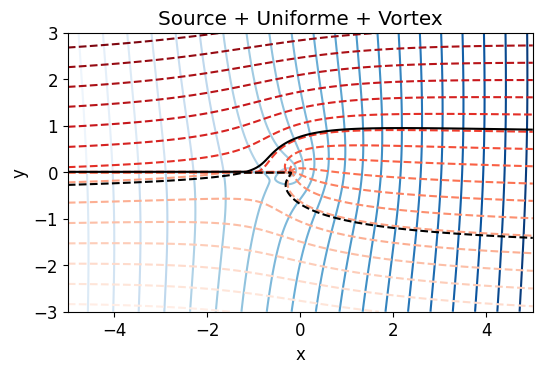

In [6]:
pl.plot_contours_phi_psi(grid,src_unif_vort,titre='Source + Uniforme + Vortex',
                         Ncontours=Ncontours,isoPsi=[-L/2,L/2.])

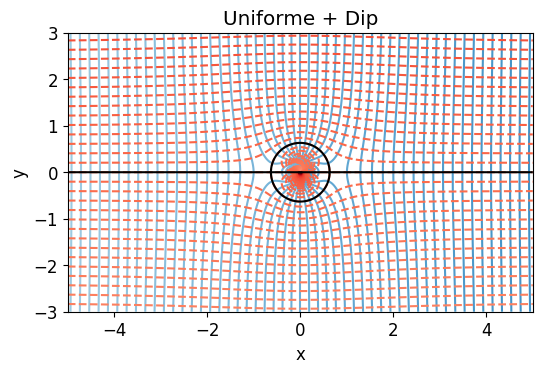

In [7]:
pl.plot_contours_phi_psi(grid,unif_dip,titre='Uniforme + Dip',
                         Ncontours=200,isoPsi=[0.])

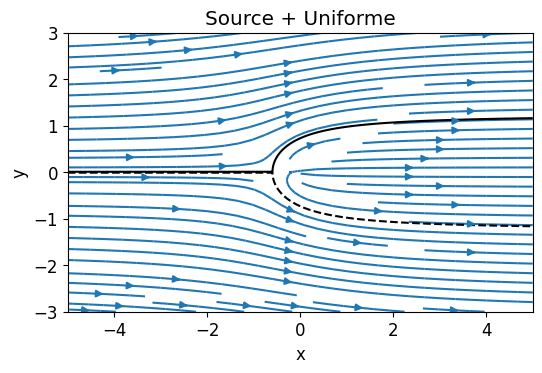

In [8]:
pl.plot_lignes_courant(grid,src_unif,titre='Source + Uniforme',isoPsi=[-L/2,L/2.])

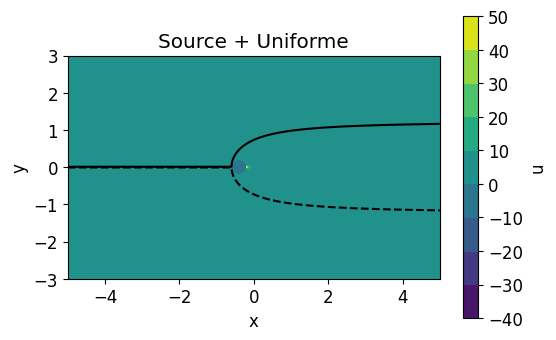

In [9]:
pl.plot_champs(grid,src_unif,'u',titre='Source + Uniforme',isoPsi=[-L/2,L/2.])

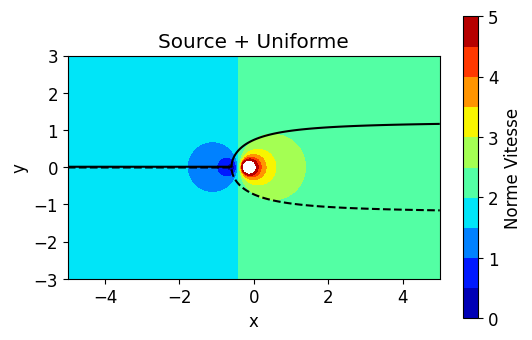

In [10]:
pl.plot_champs(grid,src_unif,np.sqrt(src_unif['u']**2+src_unif['v']**2),
               titre='Source + Uniforme',isoPsi=[-L/2,L/2.],legend='Norme Vitesse',range=[0.,5.0])

### Exercice 2 - Écoulement autour d'un cylindre
1. Créez un écoulement de vitesse $V_\infty=2.0\text{ m}$ autour d'un cylindre de rayon $R_0=0.5 \text{ m}$. Il n'y a pas de circulation. 
2. Visualisez les lignes de courant et les lignes potentielles.
3. Visualisez le champ de vitesse et le champ de pression.
4. Créez une grille correspondant à la surface du cylindre et évaluez l'écoulement sur cette grille.
5. Tracez la norme de la vitesse et le coefficient de pression $C_p$ sur la peau du cercle. 

On se souvient que l'on a identifié le rayon du cercle dans le cours en factorisant par l'écoulement uniforme et en identifiant $R_0$ selon : 
\begin{equation}
R_0 = \sqrt{\frac{\kappa}{2 \pi V_\infty}}
\end{equation}
Le rayon du cercle est le résultat de l'intensité relative du dipole et l'écoulement uniforme.

In [11]:
Vinf = 2.0
R0 = 0.5
Ka = R0**2 * 2 * np.pi * Vinf

On utilise un grille qui exclut l'intérieur du cercle car on s'intéresse seulement à l'écoulement externe. La ligne de courant $\psi=0$ partitionne l'écoulement et matérialise le cercle de rayon $r=R_0$

In [12]:
# grid = bq.create_2Dgrid_cart()
grid = bq.create_2Dgrid_cyl(rbounds=[R0-1.0e-5,10*R0])
unif = bq.uniform(grid,Vinf)
dipole = bq.dipole(grid,Ka)
unif_dip = bq.superpose_ecoulement(unif,dipole,grid)

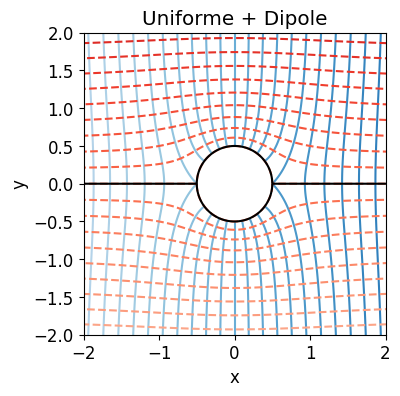

In [13]:
pl.plot_contours_phi_psi(grid,unif_dip,titre='Uniforme + Dipole',
                         Ncontours=50,isoPsi=[0.], xrange=[-2,2],yrange=[-2,2])

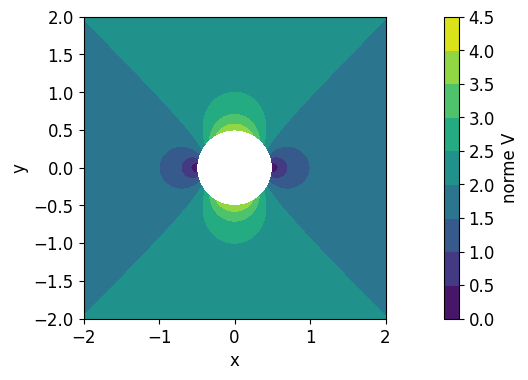

In [14]:
V = np.sqrt(unif_dip['u']**2+unif_dip['v']**2)
pl.plot_champs(grid,unif_dip,V,xrange=[-2,2],yrange=[-2,2],legend='norme V')

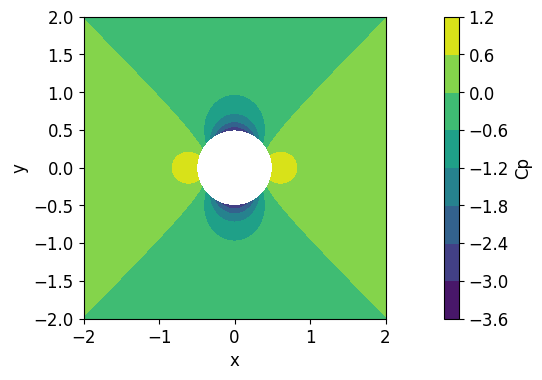

In [15]:
Cp = 1 - (V/Vinf)**2
pl.plot_champs(grid,unif_dip,Cp,xrange=[-2,2],yrange=[-2,2],legend='Cp')

Pour créer le cercle on crée une grille avec un unique point en rayon. On répète les mêmes opérations que sur la grille complète. On identifie les variables sur cette ligne en ajoutant le préfixe `cercle_`

In [16]:
nt = 360
cercle = bq.create_2Dgrid_cyl(rbounds=[R0,R0],nr=1,nt=nt)
theta_cercle = np.linspace(0,2*np.pi,nt)
print(cercle['x'].shape)

(360, 1)


In [17]:
cercle_unif = bq.uniform(cercle,Vinf)
cercle_dipole = bq.dipole(cercle,Ka)
cercle_unif_dip = bq.superpose_ecoulement(cercle_unif,cercle_dipole,cercle)
cercle_V = np.sqrt(cercle_unif_dip['u']**2+cercle_unif_dip['v']**2)
cercle_Cp = 1 - (cercle_V/Vinf)**2

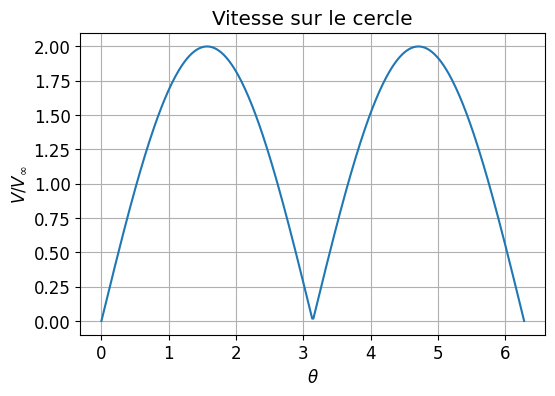

In [18]:
plt.plot(theta_cercle,cercle_V/Vinf)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$V/V_\infty$')
plt.grid()
plt.title('Vitesse sur le cercle')
plt.show()

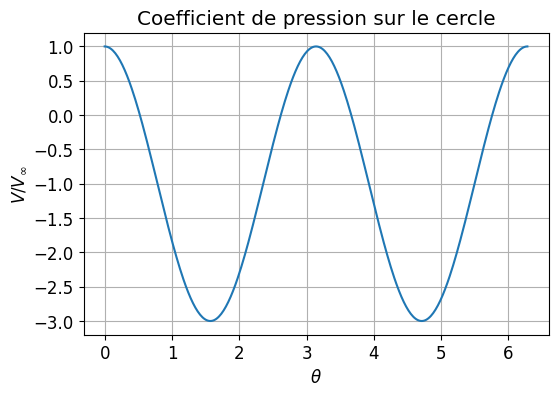

In [19]:
plt.plot(theta_cercle,cercle_Cp)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$V/V_\infty$')
plt.grid()
plt.title('Coefficient de pression sur le cercle')
plt.show()

### Exercice 3 - Écoulement autour d'un cylindre et forces aérodynamique
1. Ajoutez une circulation à cet écoulement.
2. Visualisez les lignes de courant et les lignes potentielles.
3. Visualisez le champ de vitesse et le champ de pression.
4. Créer une grille correspondant à la surface du cylindre et évaluez l'écoulement sur cette grille.
5. Tracez la norme de la vitesse et le coefficient de pression $C_p$ sur la peau du cercle. Calculez les coefficients de portance et trainée sur le cylindre. On utilisera l'intégration numérique de la méthode des trapèzes fournie par la fonction `np.trapz`
6. Faites varier l'intensité de la circulation et reprennez les étapes précédentes.


In [20]:
Vinf = 2.0
R0 = 0.5
Ka = R0**2 * 2 * np.pi * Vinf
Ga = 5.0

In [21]:
# grid = bq.create_2Dgrid_cart()
grid = bq.create_2Dgrid_cyl(rbounds=[R0-1.0e-5,10*R0])
unif = bq.uniform(grid,Vinf)
dipole = bq.dipole(grid,Ka)
unif_dip = bq.superpose_ecoulement(unif,dipole,grid)
vort = bq.tourbillon(grid,Ga,R0=R0)
unif_dip_vort = bq.superpose_ecoulement(unif_dip,vort,grid)

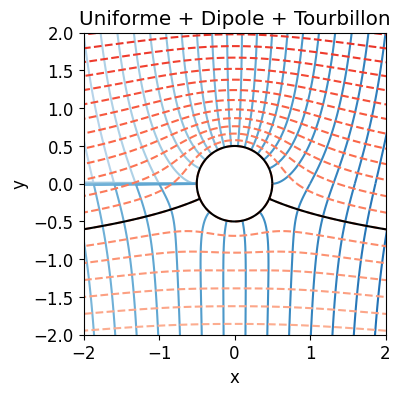

In [22]:
pl.plot_contours_phi_psi(grid,unif_dip_vort,titre='Uniforme + Dipole + Tourbillon',
                         Ncontours=50,isoPsi=[0.], xrange=[-2,2],yrange=[-2,2])

On retrouve le décalage des points d'arrêt vers le dessous du cylindre.

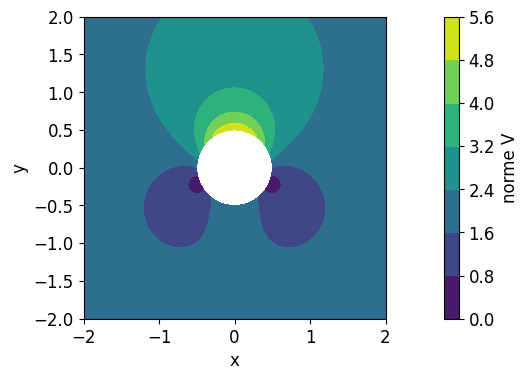

In [23]:
V = np.sqrt(unif_dip_vort['u']**2+unif_dip_vort['v']**2)
pl.plot_champs(grid,unif_dip_vort,V,xrange=[-2,2],yrange=[-2,2],legend='norme V')

On identifie la forte accélération sur le cylindre. Et les deux points d'arrêt. 

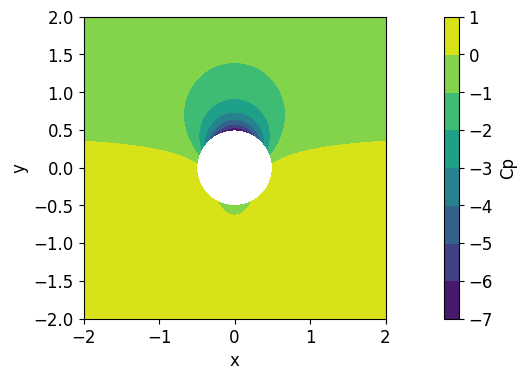

In [24]:
Cp = 1-(V/Vinf)**2
pl.plot_champs(grid,unif_dip_vort,Cp,xrange=[-2,2],yrange=[-2,2],legend='Cp')

Le champ de pression est uniforme en dessous du cercle, et il y a une intense dépression sur le dessus du cercle. Le mécanisme de suction explique la création d'une force de portance.

In [25]:
cercle = bq.create_2Dgrid_cyl(rbounds=[R0,R0],nr=1)
theta_cercle = np.linspace(0,2*np.pi,360)
cercle_unif = bq.uniform(cercle,Vinf)
cercle_dipole = bq.dipole(cercle,Ka)
cercle_unif_dip = bq.superpose_ecoulement(cercle_unif,cercle_dipole,cercle)
cercle_vort = bq.tourbillon(cercle,Ga,R0=R0)
cercle_unif_dip_vort = bq.superpose_ecoulement(cercle_unif_dip,cercle_vort,cercle)
cercle_V = np.sqrt(cercle_unif_dip_vort['u']**2+cercle_unif_dip_vort['v']**2)
cercle_Cp = 1 - (cercle_V/Vinf)**2

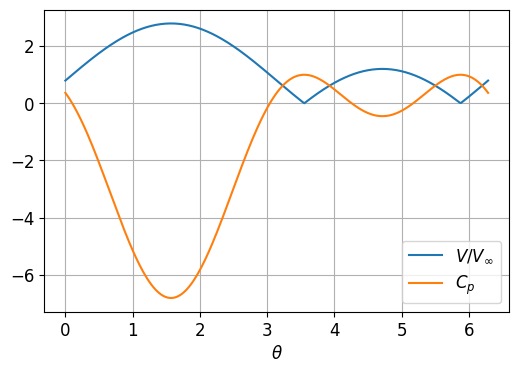

In [26]:
plt.plot(theta_cercle,cercle_V/Vinf,label=r'$V/V_\infty$')
plt.plot(theta_cercle,cercle_Cp,label=r'$C_p$')
plt.xlabel(r'$\theta$')
plt.grid()
plt.legend()
plt.show()

On va calculer les coefficients de portance et de traînée à partir de la portance $L^\prime$ et de la traînée $D^\prime$ par unité d'envergure. Notez  que la corde du cylindre est 2 fois son rayon.
\begin{align}
c_L &= \frac{L^\prime}{\rho_\infty V_\infty^2 R_0}\\
c_D &= \frac{D^\prime}{\rho_\infty V_\infty^2 R_0}
\end{align}
Et les composante horizontale et verticale de la force aérodynamique se calculent sur le cylindre :
\begin{align}
L^\prime &=-\frac{1}{2}\rho_\infty V_\infty^2 \int_0^{2\pi}{C_p \sin{\theta} R_0 d\theta}\\
D^\prime &=-\frac{1}{2}\rho_\infty V_\infty^2 \int_0^{2\pi}{C_p \cos{\theta} R_0 d\theta}
\end{align}
Finalement : 
\begin{align}
c_L &= -\frac{1}{2} \int_0^{2\pi}{C_p \sin{\theta} d\theta}\\
c_D &= -\frac{1}{2} \int_0^{2\pi}{C_p \cos{\theta} d\theta}
\end{align}

Intégration numérique sur la peau du cylindre. On utile la méthode des trapèze pour le calcul de l'intégrale.

In [27]:
CD = -0.5*np.trapz(Cp[:,0]*np.cos(theta_cercle),x=theta_cercle)
CL = -0.5*np.trapz(Cp[:,0]*np.sin(theta_cercle),x=theta_cercle)

In [28]:
print('Intégration numérique')
print(f'Coefficient de portance: {CL}')
print(f'Coefficient de trainee: {CD}')

Intégration numérique
Coefficient de portance: 5.000200007000221
Coefficient de trainee: 1.6653345369377348e-16


On vérifie la relation vue en cours :
\begin{equation}
L^\prime = \rho_\infty V_\infty \Gamma
\end{equation}
Donc en remplaçant dans la formule précédente
\begin{equation}
c_L = \frac{\Gamma}{V_\infty R_0}
\end{equation}

In [29]:
print(f'Expression analytique - Coefficient de portance: {Ga/(Vinf*R0)}')

Expression analytique - Coefficient de portance: 5.0
